Gaussian Naive Bayes

In [3]:
#Importing the needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
#Importing libraries for comparison

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris, make_classification

In [6]:
#Creating the function for Naive Bayes Classifier

def fcnNaiveBayes(X, y, X_test):
    
    intNumberOfSamples, intNumberOfFeatures = X.shape
    yUniqueClass = np.unique(y)
    intNumberOfClass = len(yUniqueClass)
    
    xMean = np.zeros((intNumberOfClass, intNumberOfFeatures), dtype = np.float64)
    xVariance = np.zeros((intNumberOfClass, intNumberOfFeatures), dtype = np.float64)
    yPrior = np.zeros(intNumberOfClass, dtype = np.float64)
    
    for intClass in yUniqueClass:
        XForEachY = X[intClass == y]
        xMean[intClass, :] = XForEachY.mean(axis = 0)
        xVariance[intClass, :] = XForEachY.var(axis = 0)
        yPrior[intClass] = XForEachY.shape[0] / float(intNumberOfSamples)
        
    yPredicted = np.zeros(X_test.shape[0])
    yProbability = np.zeros(X_test.shape[0])
    
    for intSampleIndex, testSample in enumerate(X_test):
        yPosteriorForEachSample = np.zeros(intNumberOfClass)
        for intClassIndex, intClassLabel in enumerate(yUniqueClass):
            classPrior = np.log(yPrior[intClassIndex])
            classMean = xMean[intClassIndex]
            classVariance = xVariance[intClassIndex]
            classProbability = np.sum(np.log(np.exp(-(testSample - classMean)**2 / (2*classVariance)) / np.sqrt(2*np.pi*classVariance))) + classPrior
            yPosteriorForEachSample[intClassIndex] = classProbability
        yPredicted[intSampleIndex] = np.argmax(yPosteriorForEachSample)
        yProbability[intSampleIndex] = np.max(yPosteriorForEachSample)
        
    return yPredicted, yProbability

def fcnCalculateAccuracy(y_predicted, y_test):
    return np.mean(y_predicted == y_test)

In [7]:
#Creating Dummy data

x, y = make_classification(n_samples=500, n_clusters_per_class=2, n_features=10, n_classes=2, random_state=2, n_informative=2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

y_predicted, y_probabilities = fcnNaiveBayes(x_train, y_train, x_test)
accuracy = fcnCalculateAccuracy(y_predicted, y_test)
print("The Accuracy is : ", accuracy)

The Accuracy is :  0.864


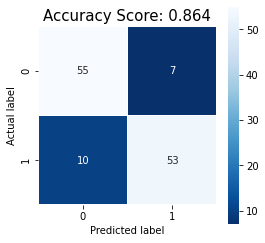

In [8]:
#Confusion Matrix 

cm = metrics.confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [9]:
#Comparison with sklearn library

NBC = GaussianNB()
NBC.fit(x_train, y_train)
y_Predicted =  NBC.predict(x_test)
score = metrics.accuracy_score(y_test, y_Predicted)
score

0.864

In [10]:
#Working on Toy Dataset

from sklearn.datasets import load_iris
data = load_iris()
X = data['data']
Y = data['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
#Using the Naive Bayes Classifier

Y_Pred, Y_Prob = fcnNaiveBayes(X_train, Y_train, X_test)
Accuracy = fcnCalculateAccuracy(Y_Pred, Y_test)

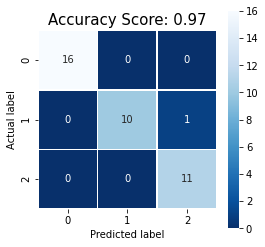

In [12]:
#Confusion Matrix 

cm_bc = metrics.confusion_matrix(Y_test, Y_Pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm_bc, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(Accuracy, 2))
plt.title(all_sample_title, size = 15);

In [13]:
#Comparison with sklearn library

NBC2 = GaussianNB()
NBC2.fit(X_train, Y_train)
Y_Predicted =  NBC2.predict(X_test)
score = metrics.accuracy_score(Y_test, Y_Predicted)
score

0.9736842105263158